In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers


In [21]:
npz = np.load('wine_data_train.npz')

trainInputs = npz['inputs'].astype(np.float32)
trainTargets = npz['targets'].astype(np.float32)

npz = np.load('wine_data_test.npz')

testInputs = npz['inputs'].astype(np.float32)
testTargets = npz['targets'].astype(np.float32)

npz = np.load('wine_data_validation.npz')

validationInputs = npz['inputs'].astype(np.float32)
validationTargets = npz['targets'].astype(np.float32)

In [22]:
input_size = 11   #11 predictors
output_size = 1   # (linearreg)
hidden_layer_size = 1  #lower layer size for a less complex regression to avoid overfitting

model = tf.keras.Sequential([                            #Added dropout for the same reason
    tf.keras.layers.Dense(hidden_layer_size, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(output_size, activation='linear')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mae', metrics = ['mae']) #changed to a less aggresive optimizer due to overfitting

batch_size = 16
MAX_EPOCHS = 2000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=23)

model.fit(trainInputs,
          trainTargets,
          batch_size = batch_size,
          epochs = MAX_EPOCHS,
          callbacks = [early_stopping],
          validation_data = (validationInputs, validationTargets),
          verbose = 1)

Epoch 1/2000
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3665 - mae: 5.3643 - val_loss: 5.1518 - val_mae: 5.1492
Epoch 2/2000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1278 - mae: 5.1251 - val_loss: 4.9466 - val_mae: 4.9435
Epoch 3/2000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9266 - mae: 4.9234 - val_loss: 4.7142 - val_mae: 4.7105
Epoch 4/2000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7436 - mae: 4.7398 - val_loss: 4.4488 - val_mae: 4.4445
Epoch 5/2000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4460 - mae: 4.4415 - val_loss: 4.1605 - val_mae: 4.1556
Epoch 6/2000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0617 - mae: 4.0566 - val_loss: 3.8686 - val_mae: 3.8630
Epoch 7/2000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9209 - mae: 3.9153 - val_loss: 3.6034 - val_mae: 3.5973
Epoch 8/2000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7881 - mae: 3.7819 - val_loss: 3.3920 - val_mae: 3.3855
Epoch 9/2000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


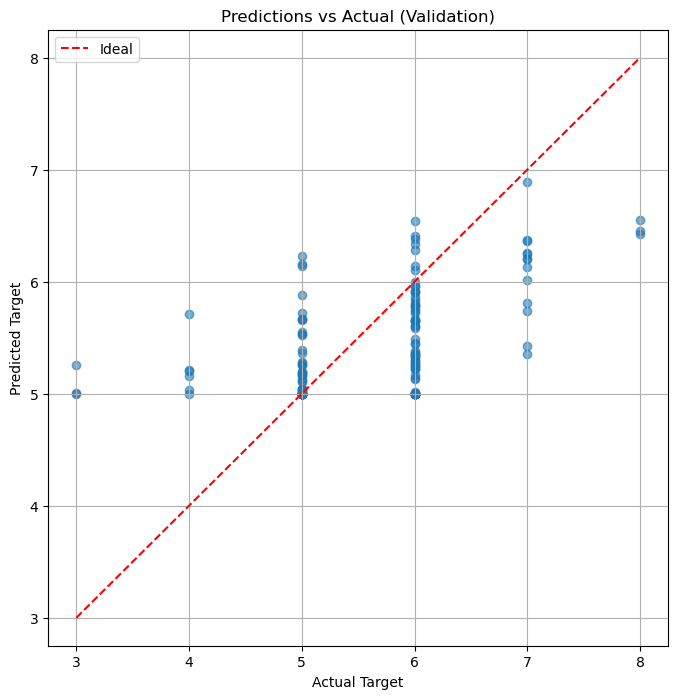

In [23]:
import matplotlib.pyplot as plt

# Predict
preds = model.predict(validationInputs)

# Scatter plot
plt.figure(figsize=(8,8))
plt.scatter(validationTargets, preds, alpha=0.6)
plt.plot([min(validationTargets), max(validationTargets)],
         [min(validationTargets), max(validationTargets)],
         'r--', label='Ideal')
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Predictions vs Actual (Validation)")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
test_loss, test_mae = model.evaluate(testInputs, testTargets, verbose=1)
print(f"Test MAE: {test_mae:.3f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4478 - mae: 0.4467 
Test MAE: 0.469


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


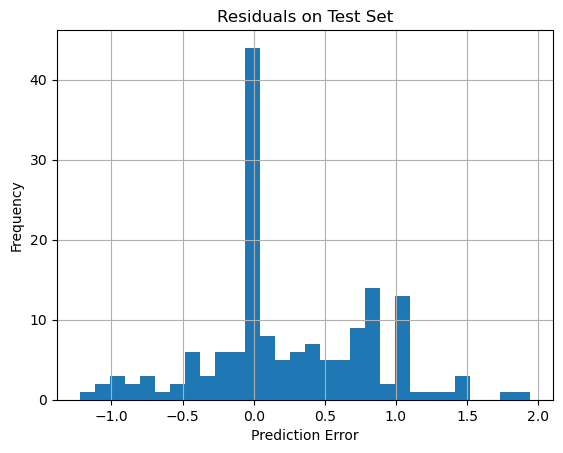

In [27]:
import matplotlib.pyplot as plt
residuals = testTargets.flatten() - model.predict(testInputs).flatten()
plt.hist(residuals, bins=30)
plt.title("Residuals on Test Set")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
